In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from implementations import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the training data into feature matrix, class labels, and event ids:

In [6]:
import datetime
from proj1_helpers import *

DATA_TRAIN_PATH = 'data/train.csv' 
y, X, ids = load_csv_data(DATA_TRAIN_PATH)
X.shape

(250000, 30)

In [8]:
X[2]

array([-9.99000e+02,  1.62172e+02,  1.25953e+02,  3.56350e+01,
       -9.99000e+02, -9.99000e+02, -9.99000e+02,  3.14800e+00,
        9.33600e+00,  1.97814e+02,  3.77600e+00,  1.41400e+00,
       -9.99000e+02,  3.21540e+01, -7.05000e-01, -2.09300e+00,
        1.21409e+02, -9.53000e-01,  1.05200e+00,  5.42830e+01,
       -2.18600e+00,  2.60414e+02,  1.00000e+00,  4.42510e+01,
        2.05300e+00, -2.02800e+00, -9.99000e+02, -9.99000e+02,
       -9.99000e+02,  4.42510e+01])

# Data preprocessing
## Missing Values

In [10]:
from missing_values import *

interpolator = MeanInterpolator()
X = interpolator.interpolate(X)

In [11]:
X[2]

array([ 1.21858528e+02,  1.62172000e+02,  1.25953000e+02,  3.56350000e+01,
        2.40373503e+00,  3.71783360e+02, -8.21688171e-01,  3.14800000e+00,
        9.33600000e+00,  1.97814000e+02,  3.77600000e+00,  1.41400000e+00,
        4.58289801e-01,  3.21540000e+01, -7.05000000e-01, -2.09300000e+00,
        1.21409000e+02, -9.53000000e-01,  1.05200000e+00,  5.42830000e+01,
       -2.18600000e+00,  2.60414000e+02,  1.00000000e+00,  4.42510000e+01,
        2.05300000e+00, -2.02800000e+00,  5.76794744e+01, -1.18452642e-02,
       -1.58228913e-03,  4.42510000e+01])

## Outliers

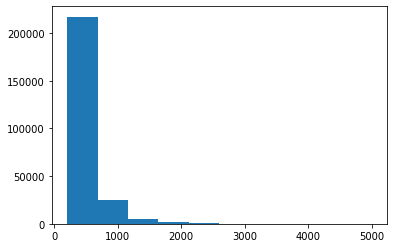

(250000,)
ditribution of the labels among the outliers :
737 -1s and 2556 1s ratio= 0.2883411580594679
Number of outliers removed :  3293


In [4]:
outlier_mask=np.linalg.norm(X,axis=1)<1500
plt.hist(np.linalg.norm(X,axis=1))
plt.show()
print(outlier_mask.shape)
# outliers removal
X = X[outlier_mask]
print('ditribution of the labels among the outliers :')
print(np.sum(y[~outlier_mask]==-1),'-1s and',np.sum(y[~outlier_mask]==1),'1s ratio=',np.sum(y[~outlier_mask]==-1)/np.sum(y[~outlier_mask]==1) )
y = y[outlier_mask]
print('Number of outliers removed : ', np.sum(~outlier_mask))

## Logistic Regression

In [15]:
def transform_y(y):
    def lambda_(x):
        res=0
        if x>0:
            res=1   
        return res
    return [lambda_(x) for x in y]


def inv_transform_y(y):
    def lambda_(x):
        res=-1
        if x>0:
            res=1
        return res
    return [lambda_(x) for x in y]

In [23]:
y=np.array(transform_y(y))

In [29]:
from cross_validation import hyper_parameter_optimisation
degrees = np.arange(3,10)
lambdas = np.logspace(-1, 2,2)
gammas = [1e-6] #np.logspace(-6, -5, 3)
params={'degree':degrees,'gamma':gammas,'lambda':lambdas,}
#call to the grid search function
best_param = hyper_parameter_optimisation(params,X,y)
#least_squares_SGD(y, X,np.zeros((X.shape[1])), 100, 1e-6)

Current iteration = 0, loss=104532.17322843565
Current iteration = 500, loss=71474.53226354894
Current iteration = 1000, loss=70105.59972067006
Current iteration = 1500, loss=69401.75488437702
Evaluated for {'degree': 3, 'gamma': 1e-06, 'lambda': 0.1} : loss = 0.8126243643599381
Current iteration = 0, loss=104533.90665177607
Current iteration = 500, loss=71809.999206305
Current iteration = 1000, loss=70645.9480382615
Current iteration = 1500, loss=70110.38727757215
Evaluated for {'degree': 3, 'gamma': 1e-06, 'lambda': 100.0} : loss = 0.8118505416758789
Current iteration = 0, loss=104599.52586696087
Current iteration = 500, loss=71309.26410093537
Current iteration = 1000, loss=69875.7425747553
Current iteration = 1500, loss=69137.48047612437
Evaluated for {'degree': 4, 'gamma': 1e-06, 'lambda': 0.1} : loss = 0.8124892524627214
Current iteration = 0, loss=104601.318767807
Current iteration = 500, loss=71648.44612894372
Current iteration = 1000, loss=70426.04936838793
Current iteration = 

In [5]:
best_param={'degree': 7, 'gamma': 1e-06, 'lambda': 0.1}

# Cross Validation


In [6]:
from cross_validation import *

In [25]:
degrees = np.arange(5,7)
lambdas = np.logspace(-4, -2, 20)
params={'degree':degrees,'lambda':lambdas}
#call to the grid search function
best_param = grid_search_cv(params,X,y,k_fold=4)

Evaluated for {'degree': 5, 'lambda': 0.0001} : loss = 0.7726693494782806
Evaluated for {'degree': 5, 'lambda': 0.00012742749857031334} : loss = 0.7726693274082003
Evaluated for {'degree': 5, 'lambda': 0.0001623776739188721} : loss = 0.7726692980044576
Evaluated for {'degree': 5, 'lambda': 0.00020691380811147902} : loss = 0.772669259493117
Evaluated for {'degree': 5, 'lambda': 0.00026366508987303583} : loss = 0.7726692095868173
Evaluated for {'degree': 5, 'lambda': 0.0003359818286283781} : loss = 0.7726691453472049
Evaluated for {'degree': 5, 'lambda': 0.00042813323987193956} : loss = 0.7726690630139066
Evaluated for {'degree': 5, 'lambda': 0.000545559478116852} : loss = 0.7726689577899933
Evaluated for {'degree': 5, 'lambda': 0.0006951927961775605} : loss = 0.772668823574352
Evaluated for {'degree': 5, 'lambda': 0.0008858667904100823} : loss = 0.772668652627313
Evaluated for {'degree': 5, 'lambda': 0.0011288378916846883} : loss = 0.7726684351570111
Evaluated for {'degree': 5, 'lambda'

## Train final model with the best parameters

In [33]:
from build_polynomial import PolynomialExpansion

degree  = best_param['degree']
lambda_ = best_param['lambda']
gamma=best_param['gamma']

expanser = PolynomialExpansion(degree,with_interractions=True)
tX       = expanser.expand(X)
weights,loss_tr  = reg_logistic_regression(y,tX,lambda_=lambda_,initial_w=np.zeros((tX.shape[1])),max_iters=100,gamma=gamma)
#weights,loss_tr = ridge_regression(y,tX,lambda_)

KeyError: 'gamma'

In [73]:
heavy_tailed_indices=[0,1,2,3,8,9,10,13,16,19,29]
logged=np.array(X,copy=True)
for i in heavy_tailed_indices:
    l=np.log(logged[:,i])
    l[l==-np.inf]=0
    l[np.isnan(l)]=0
    logged[:,i]=l
logged=np.column_stack((logged,(X[:,11]>0)*1))

C:\Users\Augustin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [74]:
##### For ridge reg ###########
best_param={'degree': 6, 'lambda': 0.01}
degree  = best_param['degree']
lambda_ = best_param['lambda']
expanser = PolynomialExpansion(degree,with_interractions=True)
tX       = expanser.expand(X)
weights,loss_tr = ridge_regression(y,tX,lambda_)

# Model evaluation

In [52]:
print('logistic acc:' ,logistic_accuracy(y,tX,weights))

logistic acc: 0.2259157624226309


In [66]:
def evaluate_model(x,y,w, print_=False):
    pred=predict_labels(w, x)
    false_positive=np.sum(pred>y)
    false_negative=np.sum(pred<y)
    true_positive=np.sum((pred==y) * (y==np.ones(len(y))*1))
    true_negative=np.sum((pred==y) * (y==np.ones(len(y))*-1))
    confusion_matrix=[[true_positive,false_positive],[false_negative,true_negative]]
    if print_:
        print("==============================")
        print('precision=',true_positive/(true_positive+false_positive))
        print('accuracy=',(true_positive+true_negative)/len(pred))
        print('recall=',true_positive/(true_positive+false_negative))
        print('f1=',true_positive/(true_positive+0.5*(false_negative+false_positive)))
        print("confusion matrix:")
        print(confusion_matrix[0])
        print(confusion_matrix[1])
        print("==============================")   
    
    return (true_positive+true_negative)/len(pred)

In [75]:
evaluate_model(tX,y,weights, print_=True)

precision= 0.7510443336477564
accuracy= 0.8141479568881305
recall= 0.6706091853063975
f1= 0.7085513059286427
confusion matrix:
[55735, 18475]
[27376, 145121]


0.8141479568881305

In [50]:
evaluate_model(tX,y,weights, print_=True)

precision= 0.7574250625051515
accuracy= 0.8150315961849481
recall= 0.6634019564197279
f1= 0.7073025239729323
confusion matrix:
[55136, 17658]
[27975, 145938]


0.8150315961849481

# Generate predictions and save ouput in csv format for submission:

In [41]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
y_sub, X_sub, ids_sub = load_csv_data(DATA_TEST_PATH)
X_sub.shape

(568238, 30)

## Apply same transformation pipeline

In [42]:
Xt_sub = interpolator.interpolate(X_sub)
Xt_sub = expanser.expand(Xt_sub)

## Prediction 

In [44]:
def logistic_predictor(X,w):
    sigm=sigmoid(X@w)
    pred = [ -1 if x<0.5 else 1 for x in sigm]
    return pred

In [50]:
#y_pred = predict_labels(weights, Xt_sub)
y_pred=logistic_predictor( Xt_sub,weights)
np.sum(y_pred)/len(y_pred)

C:\Users\Augustin\Desktop\ML\Projet1\Git\ML-CS-433\implementations.py:103: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))


-0.37866879722932995

## Save output for submission 

In [53]:
OUTPUT_PATH = 'data/submission.csv' # TODO: fill in desired name of output file for submission

create_csv_submission(ids_sub, y_pred, OUTPUT_PATH)